## Data Sourcing

One of my personal interests is health and sports. And through my constant search for an idea that attracts me to complete my project and prove all the educational goals, I found a topic about water quality and its importance in our lives. I have searched extensively for safe drinking water data on several sites, the most important of which are the World Health Organization and various healthcare facilities. I found a dataset on the World Health Organization's Kaggel website that contains the most important elements in water. This data comes from different waters and shows whether they are drinkable or not.



# Domain understanding

Healthy water is essential in our lives. It must be available to all people on this planet to prevent many potential diseases that could cause their owners to die. Therefore, the idea of investing in healthy water supplies has become an important issue in many countries, as it provides an economic benefit as it reduces health care costs that cost countries a lot of money.
In this project there is information on water data from different water bodies. Through these features that the dataset has, we will know who is transportable water.

- ph-> pH of water
- Hardness-> Capacity of water to precipitate soap in mg/L
- Solids-> Total dissolved solids in ppm
- Chloramines-> Amount of Chloramines in ppm
- Sulfate-> Amount of Sulfates dissolved in mg/L
- Conductivity-> Electrical conductivity of water in μS/cm
- Organic_carbon-> Amount of organic carbon in ppm
- Trihalomethanes-> Amount of Trihalomethanes in μg/L
- Turbidity-> Measure of light emiting property of water in NTU (Nephelometric Turbidity Units)
- Potability-> Indicates if water is safe for human consumption

In an article by the World Health Organization, it became clear that healthy water must meet the following conditions:
- The pH should be between 6.5 and 8.5.
- Desirable limit for Total dissolved solids (TDS) is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.
- Chlorine levels up to 4 milligrams per liter are considered safe in drinking water.
- Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies
- Electrical conductivity (EC)  value should not exceeded 400 μS/cm.
- According to US EPA < 2 mg/L as Total Organic Carbon (TOC) in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.
- Trihalomethanes levels up to 80 ppm is considered safe in drinking water.
- The mean turbidity value for turbidity is 5.00 NTU

# Analytic Approach

My goal in this project is to build a model that will help different companies automate healthcare programs to see if water is safe for human consumption. To achieve this goal i have to use classification or logistic algorthimes such as:
- Logistic Regression
- K Nearest Neighbours
- Support Vector Machine
- Decision Tree


# Data Requirements
The data should include the main necessary elements included in the water's composition that play a key role in determining whether the water is potable or not.
The data must be numeric to facilitate the processing of the model input

I expect the data to contain null values and unnormalized data.

In order to be able to train the model to know if the water is safe to drink, these data must be available in the dataset:
- The features included in the composition of water are divided into columns
- Split the dataset in train (0,75%  sampels) and test (0,25 sampels) datasets
- normalizing the input features of the model
- Looking at the correlation between all features and use the most important features in machine learning models.
- Cleaning the data



# Data Collection

In [145]:
# I will import the  libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [179]:
df_water_quality=pd.read_csv('water_potability.csv')
df_water_quality.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Data Understanding
### Exploratory Data Analysis

In [180]:
# This methode returns description of the numerical data in the DataFrame
df_water_quality.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Now I will check the type of columns that exist and see if there are null values.

In [181]:
df_water_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


<AxesSubplot:>

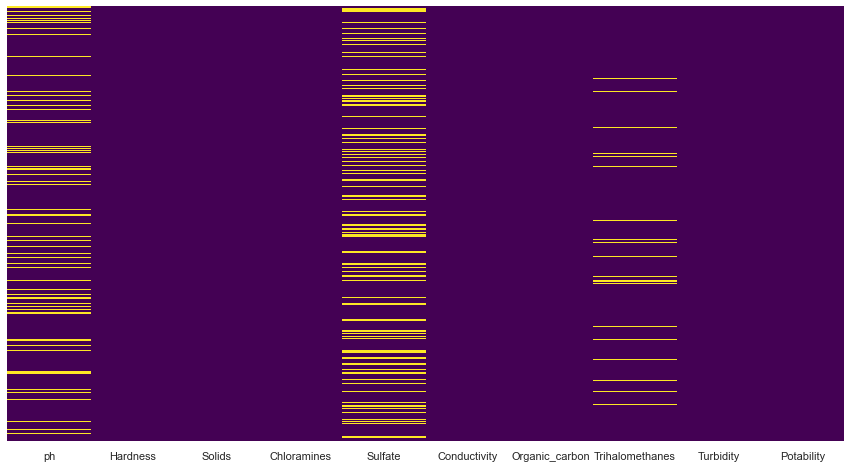

In [182]:
sns.heatmap(df_water_quality.isnull(),yticklabels=False,cbar=False,cmap='viridis')

I noticed that there are 3 columns with null values: ph, Sulfate, Trihalomethanes.

Now I will see how many null values are in each of these three columns:

In [183]:
nullValues_Ph=df_water_quality["ph"].isnull().sum()
nullValues_Sulfate=df_water_quality["Sulfate"].isnull().sum()
nullValues_Trihalomethanes=df_water_quality["Trihalomethanes"].isnull().sum()
print("Ph column has {} null values, Sulfate column has {} null values and Conductivity column has {} null values".format(nullValues_Ph,nullValues_Sulfate,nullValues_Trihalomethanes))

Ph column has 491 null values, Sulfate column has 781 null values and Conductivity column has 162 null values


There are 491 null values in ph column
There are 781 null values in Sulfate column
There are 162 null values in Trihalomethanes column

<Figure size 1080x576 with 0 Axes>

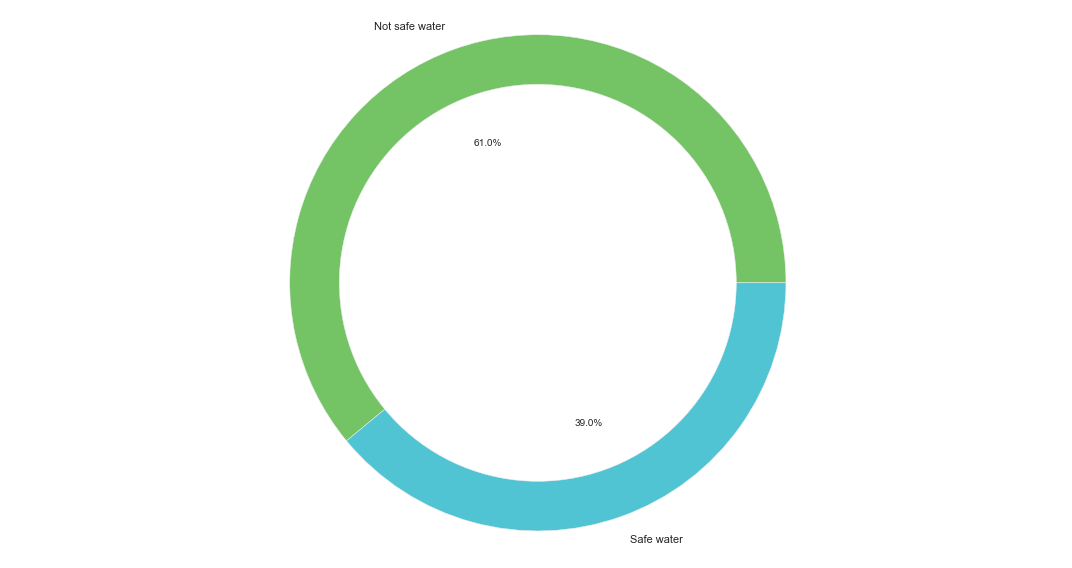

In [186]:
# Define colors for Safe water and not safe water.
blue = '#51C4D3'
green = '#74C365'
plt.clf()
plt.style.use('ggplot')
fig1, ax1 = plt.subplots()
ax1.pie(df_water_quality['Potability'].value_counts(), colors=[green, blue], labels=['Not safe water', 'Safe water'], autopct='%1.1f%%', startangle=0, rotatelabels=False)
plot = plt.Circle((0,0),0.80, fc='white')
ax1.axis('equal')
fig = plt.gcf()
fig.gca().add_artist(plot)
plt.tight_layout()
plt.show()

### Data Preperation

Now I will analyze the missing data to see what kind of missing types have these columns and process it later.

### Checking for correlations
I'm going to look at the data and see if there are associations between all features in the dataset.

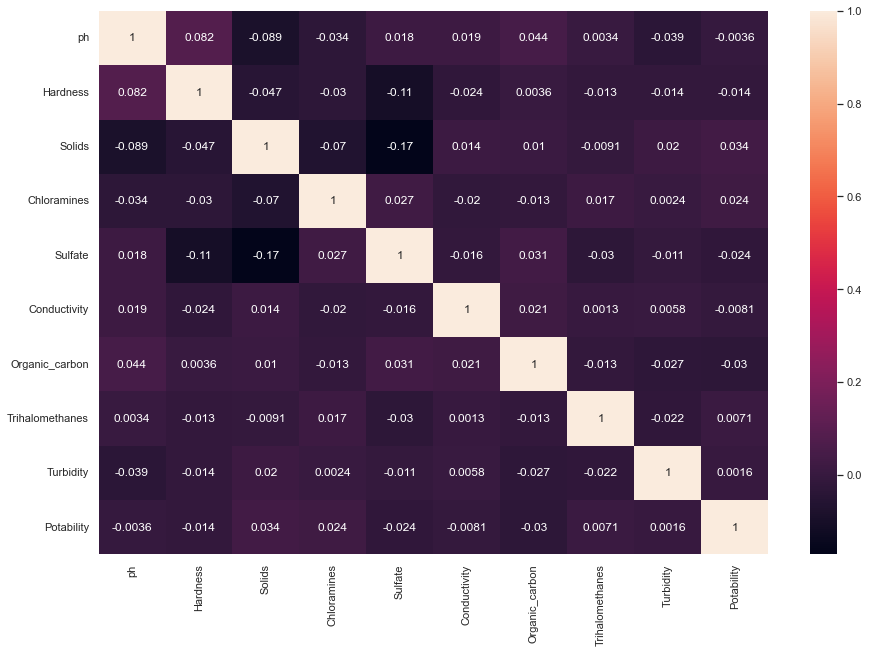

In [184]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_water_quality.corr(), annot=True)
plt.show()

I noticed from the Correlation Matrix that the strength of the relationships between columns that contain nulls and Potability is very low, so I'm going to calculate the effect of these nulls on the Potability column:

In [151]:
df_water_quality[df_water_quality["Sulfate"].isnull()]
df_water_quality['Sulfate_NV']=np.where(df_water_quality["Sulfate"].isnull(),1,0)
df_water_quality.groupby("Potability")["Sulfate_NV"].mean()


Potability
0    0.244244
1    0.229264
Name: Sulfate_NV, dtype: float64

In [152]:
df_water_quality[df_water_quality["ph"].isnull()]
df_water_quality['Ph_NV']=np.where(df_water_quality["ph"].isnull(),1,0)
df_water_quality.groupby("Potability")["Ph_NV"].mean()


Potability
0    0.157157
1    0.138498
Name: Ph_NV, dtype: float64

In [153]:
df_water_quality[df_water_quality["Trihalomethanes"].isnull()]
df_water_quality['Trihalomethanes_NV']=np.where(df_water_quality["Trihalomethanes"].isnull(),1,0)
df_water_quality.groupby("Potability")["Trihalomethanes_NV"].mean()

Potability
0    0.053554
1    0.043036
Name: Trihalomethanes_NV, dtype: float64

From the result shown above, it was found that there is a relationship between the missing data in Sulfate & ph columns and the non-potable water data, and this indicates that the data was lost at random way.

The result of the mean of the missing data in this column (Trihalomethanes) is enough to tell me that it was Missing completely at random  and that it has no correlation with the other columns.

#### Conclusion:
Sulfate and ph = MAR
Trihalomethanes = MCAR

Trihalomethanes column appeared to be the column with the least null values . I will fill these values with the average of the values in it but I will check if these are a symmetrical values.

C:\Users\Ammar Almasri\anaconda3\envs\WaterQuality(V2)\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


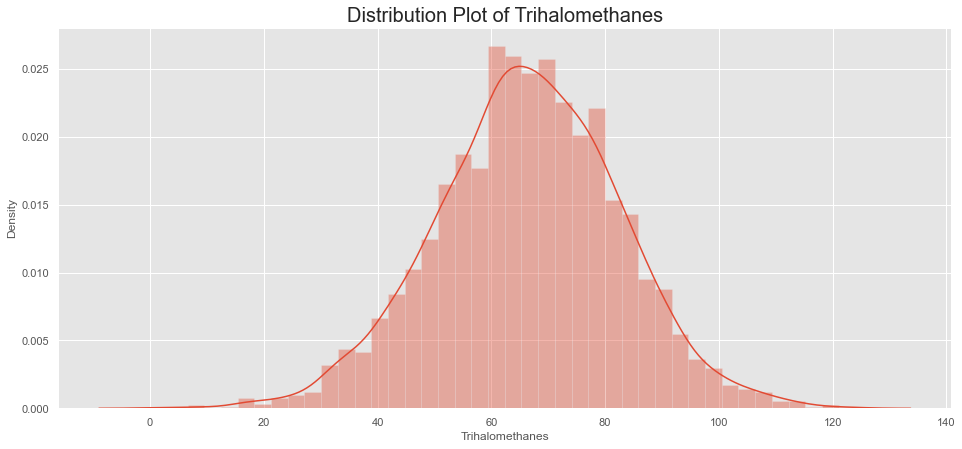

In [154]:
df_water_quality.drop(['Ph_NV', 'Trihalomethanes_NV','Sulfate_NV'], axis=1, inplace=True)

plt.figure(figsize = (16, 7))
sns.distplot(df_water_quality['Trihalomethanes'])
plt.title('Distribution Plot of Trihalomethanes', fontsize =  20)
plt.show()

The graph has shown that the values in this column (Trihalomethanes) symmetrical. I will add the average of the values in place of the null values and I will delete all the rows with null values in the other columns (ph,Sulfate).

In [155]:
df_water_quality['Cleaned_Trihalomethanes']=df_water_quality['Trihalomethanes'].fillna(df_water_quality['Trihalomethanes'].mean())
df_water_quality=df_water_quality.drop(['Trihalomethanes'],axis=1)

Because these columns (Sulfate and ph) have an effect on the Potability result, and because they also contain a larger amount of null values, it would be better to delete these null values so as not to affect the model's work.

In [157]:
df_water_quality=df_water_quality.dropna(subset=["ph","Sulfate"])
df_water_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ph                       2116 non-null   float64
 1   Hardness                 2116 non-null   float64
 2   Solids                   2116 non-null   float64
 3   Chloramines              2116 non-null   float64
 4   Sulfate                  2116 non-null   float64
 5   Conductivity             2116 non-null   float64
 6   Organic_carbon           2116 non-null   float64
 7   Turbidity                2116 non-null   float64
 8   Potability               2116 non-null   int64  
 9   Cleaned_Trihalomethanes  2116 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 181.8 KB


After I clean the dataset from nulls I have to check if it contains outliers because it has a big impact on the model's working performance.

### Check outliers

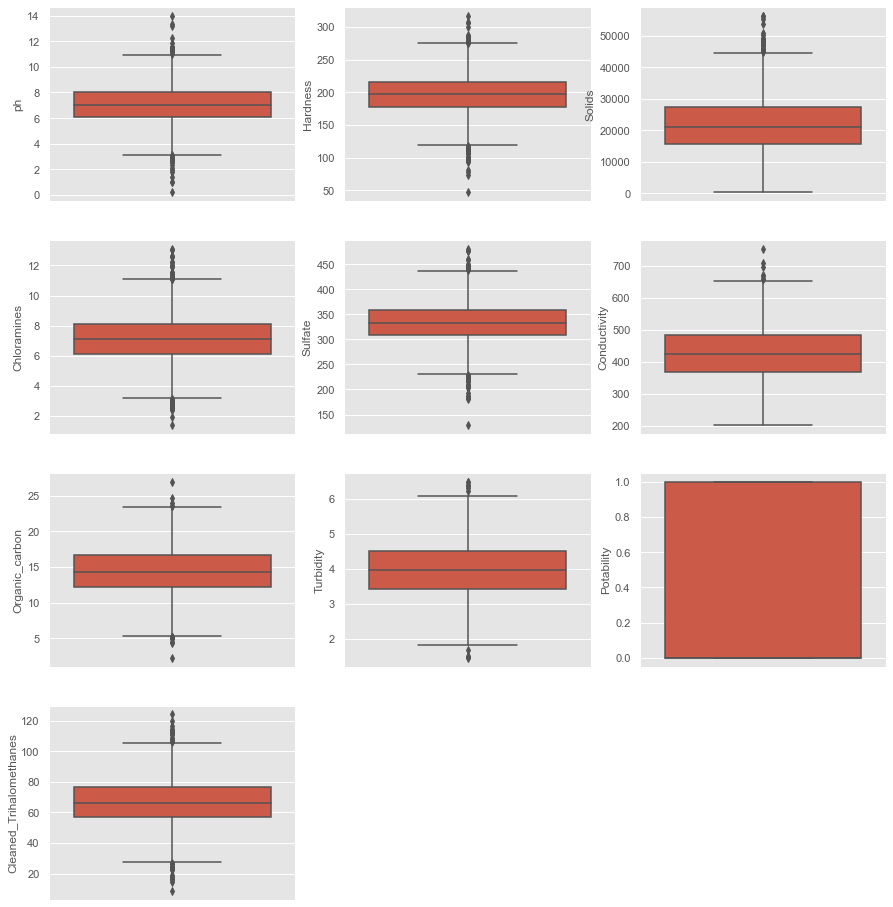

In [159]:
i=1
plt.figure(figsize=(15,25))
for feature in df_water_quality.columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=df_water_quality[feature])
    i+=1

From the graph above I have seen that there are bars (Sulfate, Hardness, Conductivity, Organic_carbon, ph") that contain outliers.

These outliers will negatively affect the performance of the model during training so I will now do all these outliers and then delete them.
I'm going to use the Inter quartile range (IQR) method to do that because The concept of  IQR can best be visualized from the boxplot. It has the minimum and maximum point defined as Q1–1.5*IQR and Q3+1.5*IQR respectively. Any point outside this range is outlier.

### Remove Outliers

In [160]:
# First I will create two functions one to collect outliers and one to delete them.

def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 =df[ft].quantile(0.80)
    IQR = Q3 - Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    ls= df.index[(df[ft] < lower_bound)| (df[ft]>upper_bound)]
    return ls

def remove (df,ls):
    ls =sorted(set(ls))
    df =df.drop(ls)
    return df

In [161]:
# Collect the outliers from these features
index_list=[]
for feature in ["Sulfate", "Hardness","Conductivity","Organic_carbon","ph"]:
    index_list.extend(outliers(df_water_quality, feature))

In [162]:
#Remove them
df_water_quality_cleand= remove(df_water_quality,index_list)

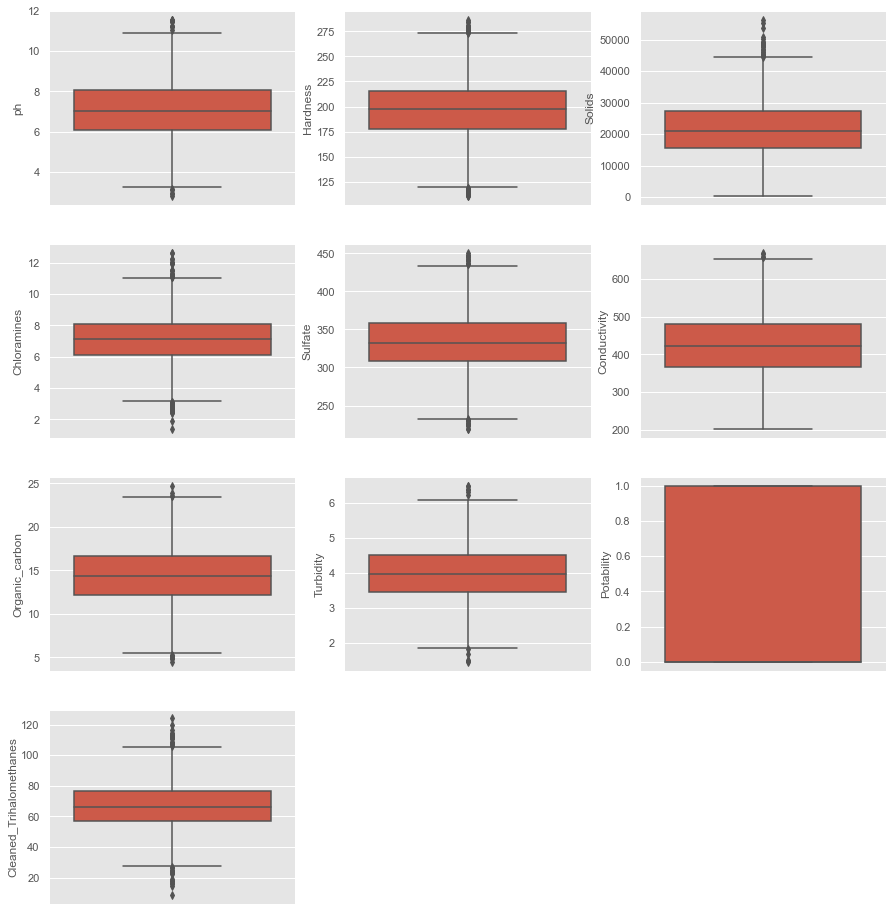

In [163]:
#Visualise the new dataset
i=1
plt.figure(figsize=(15,25))
for feature in df_water_quality_cleand.columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=df_water_quality_cleand[feature])
    i+=1

From the graphs of the new dataset it turns out that I managed to tackle the outliers. I can now use it in the modelling process.

In [164]:
df_water_quality_cleand

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Turbidity,Potability,Cleaned_Trihalomethanes
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,4.628771,0,100.341674
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,4.075075,0,31.997993
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,2.559708,0,54.917862
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,2.672989,0,84.603556
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,4.401425,0,62.798309
...,...,...,...,...,...,...,...,...,...,...
3265,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,3.361833,1,62.906205
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,4.613843,1,55.069304
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,3.442983,1,28.878601
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,3.669712,1,60.419921


# Preprocessing
I will first define the inputs and outputs of the model.

In [165]:
X=df_water_quality_cleand.drop(['Potability'],axis=1)
y=df_water_quality_cleand['Potability']

I will now standardize the input values to make them easier and faster to read when using the model.

In [166]:
scaler = StandardScaler()
x=scaler.fit_transform(X)

I will now divide the data into training data and test data. Where the training data will take 75% of the random samples from the data and the test data will take 25%.

In [167]:
# split the data to train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=42)
print("training data shape:-{} labels{} ".format(x_train.shape,y_train.shape))
print("testing data shape:-{} labels{} ".format(x_test.shape,y_test.shape))

training data shape:-(1542, 9) labels(1542,) 
testing data shape:-(515, 9) labels(515,) 


In [168]:
# I will now define all the algorithms I will use to train the model.
SCV_Model = SVC()
Logistic_Model = LogisticRegression()
RandomForest_Model = RandomForestClassifier()
KNeighbors_Model = KNeighborsClassifier()

In [169]:
# fitting and scoring the training set
SCV_Model.fit(x_train,y_train)
score_1 = SCV_Model.score(x_train,y_train)

Logistic_Model.fit(x_train,y_train)
score_2 = Logistic_Model.score(x_train,y_train)

RandomForest_Model.fit(x_train,y_train)
score_3 = RandomForest_Model.score(x_train,y_train)
test_score= RandomForest_Model.score(x_test,y_test)

KNeighbors_Model.fit(x_train,y_train)
score_4 = KNeighbors_Model.score(x_train,y_train)


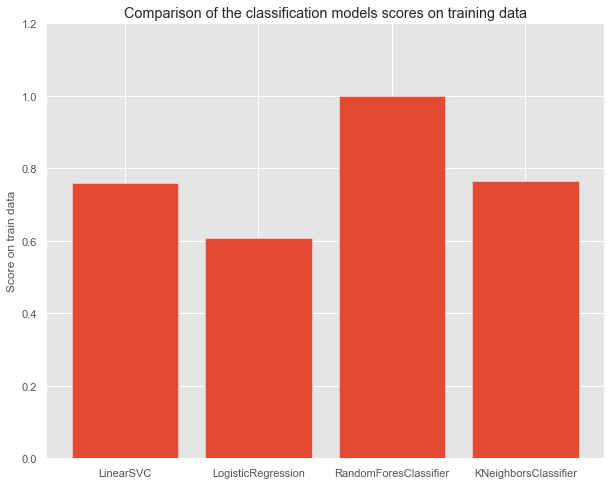

In [170]:
score_data = {"LinearSVC" : score_1,
              "LogisticRegression" : score_2,
              "RandomForesClassifier" : score_3,
              "KNeighborsClassifier" : score_4}
fig , ax = plt.subplots(figsize = (10,8))
ax.bar(score_data.keys() , score_data.values())
ax.set(ylabel = "Score on train data",
      title = "Comparison of the classification models scores on training data",
      ylim = (0,1.2));

From the above graph I have found that the best algorithm for data processing is RandomForesClassifie. But this is not necessarily the best. I noticed that this algorithm contains an overfitting problem.

Overfitting is a problem that talks about classifying data in a model. It gives us high accuracy in training and low accuracy in testing. This high accuracy of the model can cause errors if the model uses different data. Overfitting may not be proportional to the new data and may affect the prediction accuracy of future observations.

I'll ues Gridsearch  to give the hyperparmeters of these algorithms the appropriate values ​​ to improve model performance.

#### Hyperparameters Tuning

A hyperparameter is a parameter whose value is used to control the operation of an algorithm. The more correct the values of these hyperparametrs, the higher the efficiency of the algorithm and the greater the accuracy.
In this case, the hyperparametr that plays a key role in controlling the learning process is K, so I'll give it different values and I'll take the best value for it when the control accuracy is high

In [171]:

model_params = {
    'svc': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20,30,50],
            'kernel': ['rbf','linear','poly']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10,50,100]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'KNN' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3,7,11,13]
        }
    }
}

In [172]:
from sklearn.model_selection import GridSearchCV
scores = []
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    validation=cross_val_score(clf, x_train, y_train, cv=5)
    scores.append({
        'model': model_name,
        'train_score': clf.best_score_,
        'best_params': clf.best_params_,
        'test_score': clf.score(x_test,y_test),
        'Cross_validation': np.mean(validation)
    })
df_score= pd.DataFrame(scores,columns=['model','train_score','test_score','Cross_validation','best_params'])
df_score

,model,train_score,test_score,Cross_validation,best_params
0,svc,0.690037,0.685437,0.690037,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.679649,0.660194,0.660841,{'n_estimators': 100}
2,logistic_regression,0.599876,0.598058,0.599876,{'C': 1}
3,KNN,0.664059,0.646602,0.661461,{'n_neighbors': 13}


<AxesSubplot:>

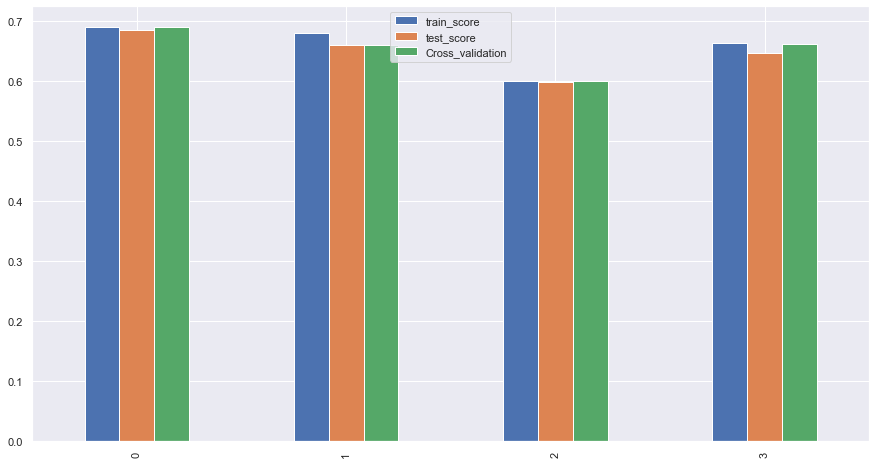

In [173]:
sns.set(rc = {'figure.figsize':(15,8)})
df_score.plot(kind='bar',legend=True)

After improving the performance of the algorithm I was able to solve the problem of overfitting and it turned out that the best algorithm for this model is SVM.

In [174]:
SVCmodel= SVC(C=1, kernel="rbf")
SVCmodel.fit(x_train,y_train)
y_pred = SVCmodel.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[290,  19],
       [143,  63]], dtype=int64)

<AxesSubplot:>

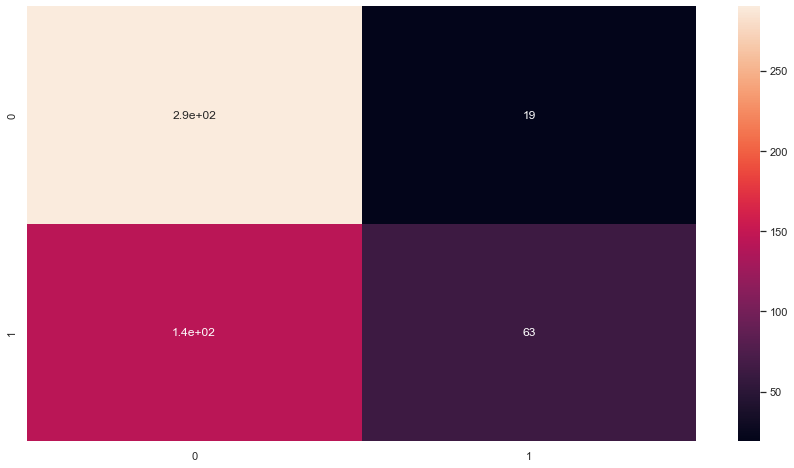

In [175]:
sns.heatmap(cm, annot=True)

I did research on how to avoid model overfitting than using certain algorithms to obtain a certain quality
Among the most important of these methods:
- Hold-out (data)
Divide the data into training data and test data. Where the largest relative training has about 70% of the data. Then use the test data to test the accuracy of the model’s work
- Cross-validation (data)
In this process the data is checked intermittently. Each time the model trains a data set and leaves some for testing. The test data each time is different from the other to include all data
- Feature selection (data)
The more traits selected in a model's training, the greater the chance of overfitting. So only the important columns should be selected to avoid this happening
- Dropout (model)
By applying a dropout, which is a form of regularization, to our layers, we ignore a subset of units of our network with a set probability. Using dropout, we can reduce interdependent learning among units, which may have led to overfitting. However, with dropout, we would need more epochs for our model to converge.

Now I'm going to try Cross Validation to avoid overfitting during model work and I'm going to use the K-fold strategy for that:

I'm going to try it with the RandomForesClassifier algorithm because I found out before that it has an overfitting

In [176]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
kf =KFold(n_splits=5, shuffle=True, random_state=42)
cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 1645, Test set:412
Fold:2, Train set: 1645, Test set:412
Fold:3, Train set: 1646, Test set:411
Fold:4, Train set: 1646, Test set:411
Fold:5, Train set: 1646, Test set:411


In [177]:

score = cross_val_score(RandomForestClassifier(random_state= 42), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
result= pd.DataFrame(score)
print("resut accuracy", result.mean()*100)

Scores for each fold are: [0.6868932  0.6407767  0.67396594 0.66909976 0.72262774]
resut accuracy 0    67.867267
dtype: float64


I saw that Cross Validation's accuracy was high and terrifying at the same time.
Summary:
In this project, I learned a lot about how algorithms work and how they should be dealt with to obtain high working accuracy and that there are several problems that we may face such as overfitting or underfiiting. I also learned how I can solve these problems in many different ways.
Now I am very excited to get to know more in the world of machine learning I will start by learning about the high Algorithems parameters and how to reduce the possible errors in the models.
Thank you.